$$
\newcommand{\b}[1]{\mathbb{#1}}
\newcommand{\v}[1]{\mathbf{#1}}
\newcommand{\vt}[1]{\mathbf{#1}^\top}
\newcommand{\prob}[1]{\textrm{Pr}\left[ #1 \right]}
$$

# Binary Classification with Linear Discriminant Analysis

I was introduced to classification in one of my statistics courses and thought that a good way to understand it would be to write about it. In this article I aim to give some mathematical background to this method and try to use it on an actual dataset. I will try to develop a geometric intuition for the method along the way.

## Intuition

Let us start with a simple two-dimensional example. Say we have a line $L$ given by $y + ax + b = 0$. This line divides $\b{R}^2$ into two parts. Now every point in $\b{R}^2$ not on the line has to be in one of these two parts. This is essentially what we're doing with linear discriminant analysis. Creating a "line" (generalised to higher dimensions) that divides your data set into two classes.

Now try to see how this will actually happen. Given a point $P = (x_0, y_0)$, can we find which side of the line it lies one? Yes! You could draw a vertical line passing through $P$ intersecting $L$ at $(x_0, -a x_0 - b)$ and then compare that $y$-coordinate with $y_0$ to see if $P$ is *below* or *above* the line. Let the region above the line be $R_1$ and the region below the line be $R_2$. That means we now have a simple rule, or a *classifier*.

**Rule:** If $y_0 + ax_0 + b > 0$, then the point $(x_0, y_0)$ is in the region $R_1$. Otherwise, the point is in $R_2$.


**TODO:** insert diagram here for a line

This is basically what we're going to generalize to higher dimensions. Assume that our data is p-dimensional, then by using some vectors and slightly different notation, this same rule can be expressed as follows.

**Rule:** If $\v{l} \cdot \v{x} > c$, then the point $\v{x}$ belongs to the class $R_1$, otherwise it belongs to the class $R_2$. Here $\v{l}$ is a p-dimensional vector and $c$ is a constant.

This notation in terms of a dot product turns out to be really useful because it reduces this classification problem from p-dimensions to just one dimension. We can think of this to be the *projection* of $\v{x}$ onto the vector $\v{l}$ and because it is a scalar, comparison with our threshold $c$ can easily classify it.

Now our task of classification basically boils down to finding the vector $\v{l}$ and the constant $c$. We define a **training set** to be an already classified sample. Using some statistical methods, we will analyse this training set and try to find $\v{l}$ and $c$ to fit these known classifications. Once we have these values, we can then *test* any other point with it.

## Analysis

### Assumptions

First of all, we need to lay down some assumptions about the kind of data that we're dealing with.
1. We're doing binary classification. A p-dimensional point $\v{x}$ can be in the class $\Pi_1$ or $\Pi_2$
1. These classes are *normally distributed*, i.e. the conditional probabilities $\prob{\v{x} | \Pi_1}$ and $\prob{\v{x} | \Pi_2}$ are assumed to have multivariate normal distributions with means $\v{\mu_1}$, $\v{\mu_2}$ and equal covariance $\Sigma$
1. $\Sigma$ is a diagonal matrix, which implies that the components of our random vector are all pairwise independent

### Choosing the vector parameter

Okay, now we're ready to start. Straight up, we'll transform the population into their projections using the dot product. So the probability distributions now have means $\vt{l}\v{\mu_1}$, $\vt{l}\v{\mu_2}$ and covariance $\vt{l}\Sigma\v{l}$. To have a good estimate of what our $\v{l}$ should be, we first define a notion of *distance* between these two classes as follows.

$$
S = \frac{\left[ \vt{l}(\v{\mu_1} - \v{\mu_2}) \right] ^2}{\vt{l}\Sigma\v{l}}
$$

This definition makes sense because it can be thought of as a ratio of *inter* class distance to *intra* class distance, and we want a $\v{l}$ that would maximise this expression. The maximum value can be found using a little trick with Cauchy-Schwarz inequality.

$$
\begin{aligned}
S &= \frac{\vt{l}(\mu_1 - \mu_2)}{\vt{l}\Sigma\v{l}} = \frac{\left[ \vt{l} \Sigma^{\frac{1}{2}} \right] ^2 \left[\Sigma ^{\frac{-1}{2}}(\mu_1 - \mu_2) \right] ^2}{\vt{l}\Sigma\v{l}} \\
&\leq 
\frac{\left[ \vt{l} \Sigma^{\frac{1}{2}} \Sigma^{\frac{1}{2}} \v{l} \right] \left[ \vt{(\mu_1 - \mu_2)}\Sigma ^{\frac{-1}{2}} \Sigma ^{\frac{-1}{2}}(\mu_1 - \mu_2) \right]}{\vt{l}\Sigma\v{l}} \\
&= \vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{(\mu_1 - \mu_2)}
\end{aligned}
$$

We now also know the condition when this maximum will be attained, because of Cauchy-Schwarz. Taking care of the dimensions of these vectors, we have

$$
\vt{l} \Sigma^{\frac{1}{2}} = \vt{(\mu_1 - \mu_2)} \Sigma^{\frac{-1}{2}}
$$

We can now use this $\v{l}$ for further analysis, giving us our **linear discriminant function**
$$
\vt{l} \v{x} = \vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{x}
$$

### Choosing the scalar parameter

To find a good value for $c$, we'll first look at some expectations. Define, for $i = 1, 2$,

$$
m_i = \textrm{E}\left[ \vt{l}\v{x} | \Pi_i \right] = \vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{\mu_i}
$$

Since $\Sigma$ is positive semi-definite (because covariance matrices have to be), we have

$$
m_1 - m_2 = \vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{(\mu_1 - \mu_2)} \geq 0
$$

Therefore, we can safely take $c = \frac{m_1 + m_2}{2}$ as their midpoint and depending on which point our $\v{x}$ is closer to, we can classify it. We now have a rule like before.

**Rule:** If $\vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{x} > \frac{1}{2} \vt{(\mu_1 - \mu_2)} \Sigma^{-1} \v{(\mu_1 + \mu_2)}$, then $\v{x}$ is in $\Pi_1$, otherwise it is in $\Pi_2$.

### Training

It seems like we're done but we haven't used our training set yet. In most cases, when you're given a dataset you wouldn't know $\mu_1$, $\mu_2$ or $\Sigma$. This is where we'll use the training set and use *estimates* of these quantities instead.

Assume that we're given the classes $\left( \v{x_1}^{(1)} \ldots \v{x_{n_1}}^{(1)} \right)$ and $\left( \v{x_1}^{(2)} \ldots \v{x_{n_2}}^{(2)} \right)$ as our training set. We can use the *sample means* $\bar{x}_i$, the *sample covariances* $\mathbb{S}_i$ and the *pooled sample covariance* $\mathbb{S}$ to generate the following rule,

**Rule:** If $\vt{(\bar{x}_1 - \bar{x}_2)} \mathbb{S}^{-1} \v{x} > \frac{1}{2} \vt{(\bar{x}_1 - \bar{x}_2)} \mathbb{S}^{-1} \v{(\bar{x}_1 + \bar{x}_2)}$

Where,
$$\bar{x}_i = \frac{1}{n_i}\sum_{j = 1}^{j = n_i} \v{x_j}^{(i)}$$
$$(n_1 + n_2 - 2) \mathbb{S} = (n_1 - 1) \mathbb{S}_1 + (n_2 - 1)\mathbb{S_2}$$
$$\mathbb{S}_i = \frac{1}{n_i - 1} \sum_{j = 1}^{j = n_i} \v{(x_j - \bar{x}_i)} \vt{(x_j - \bar{x}_i)}$$

## Example

We are now in a position to implement and verify this rule on an actual dataset. First let us generate our training set and plot it to visualise it. Generating this data ourselves from two known Gaussians makes verification of our results simpler.

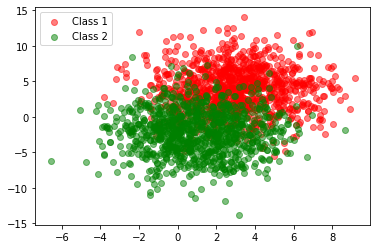

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed to get the same results on each run
np.random.seed(seed=0)

# Initialize parameters
cov = [[5, 0], [0, 10]]
mu1 = (3, 4)
n1 = 1000
mu2 = (1, -2)
n2 = 1000

# Generate sample
g1 = np.random.multivariate_normal(mu1, cov, size=n1).T
g2 = np.random.multivariate_normal(mu2, cov, size=n2).T

# Plot the classes
data = (g1, g2)
colors = ("red", "green")
labels = ("Class 1", "Class 2")

fig = plt.figure()
ax = fig.add_subplot(111)

for data, color, label in zip(data, colors, labels):
    x, y = data
    ax.scatter(x, y, alpha=0.5, c=color, label=label)

ax.legend(loc=2)

Treating this as our training set, we can find our parameters using the sample means and covariances.

86.05000000000001


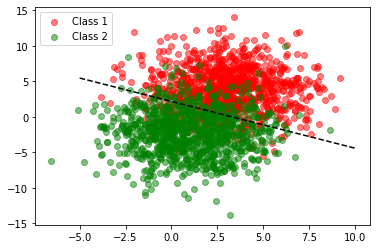

In [2]:
sample_mean_1 = np.mean(g1, axis=1, keepdims=True)
sample_mean_2 = np.mean(g2, axis=1, keepdims=True)

sample_cov_1 = np.dot(g1 - sample_mean_1, (g1 - sample_mean_1).T) / (n1 - 1)
sample_cov_2 = np.dot(g2 - sample_mean_2, (g2 - sample_mean_2).T) / (n2 - 1)
pooled_cov = ((n1 - 1) * sample_cov_1 + (n2 - 1) * sample_cov_2) / (n1 + n2 - 2)

l = np.dot((sample_mean_1 - sample_mean_2).T, np.linalg.inv(pooled_cov)).T
c = np.dot(l.T, sample_mean_1 + sample_mean_2) / 2

# Calculate accuracy
wrong = 0.0
for i in range(1000):
    if (np.dot(l.T, g2[:, [i]]) > c):
        wrong += 1
    if (np.dot(l.T, g1[:, [i]]) < c):
        wrong += 1
accuracy = (1 - wrong / 2000) * 100
print(accuracy)

# Plot the decision line
x = np.linspace(-5, 10, num=1000)
y = (c - l[0] * x) / l[1]
x = np.reshape(x, 1000)
y = np.reshape(y.T, 1000)

ax.plot(x, y, color='black', linestyle='dashed')
fig

Great! We now have our rule and we can see that it works reasonably well. Classification will be more accurate if our training set has two neat clusters, that is, less variance.

We can now test this rule on some unknown data. Remember, all we're doing is finding out which side of the line our test point is.

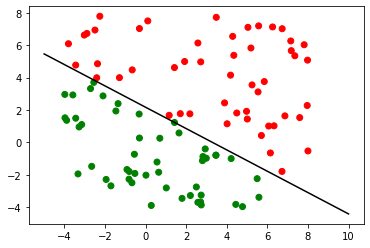

In [3]:
# Generate random points in the rectangle between (-4, -4) and (8, 8)
test_set = np.random.rand(2, 100) * 12 + [[-4], [-4]]

# Apply colors based on our rule
colors = []
for i in range(100):
    pt = test_set[:, [i]] # get the current point
    if (np.dot(l.T, pt) > c):
        colors.append('red')
    else:
        colors.append('green')

# Plot
fig.clear()
ax = fig.add_subplot(111)
ax.plot(x, y, color='black')
ax.scatter(test_set[[0], :], test_set[[1], :], color=colors)
fig

So we've seen the geometric intuition behind using this linear classifier and tried to implement it. We can see that it works, but its accuracy goes down rapidly as the variance in our data increases. We've also made some very important assumptions. Still, linear classifiers give us a simple and efficient method to do this task and might be all that's needed for some use cases.

You can find a Jupyter notebook for this article [here](https://github.com/mayant15/Notebooks)